# Advertising Sales Channel Prediction

### Importing packages

In [491]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [492]:
df=pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [493]:
#checking the shape of dataset
df.shape

(200, 5)

We have 200 rows and 5 columns in the dataset including our target variable "sales".

In [494]:
#Removing the unwanted column
df=df.drop("Unnamed: 0",axis=1)

In [495]:
#checking the datatypes for all the columns
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Dependent and Independent variables are of float type.

In [496]:
#checking the missing values in the dataset
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no missing values in the dataset.

In [497]:
#checking statistical data
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA

### Univariate Analysis

<AxesSubplot:xlabel='TV'>

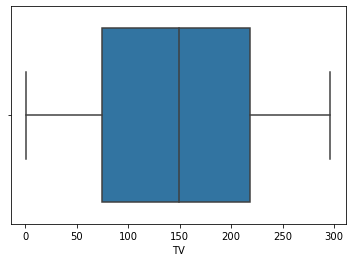

In [498]:
sns.boxplot(df["TV"])

Above boxplot shows that "TV" column has no outliers.

<AxesSubplot:xlabel='radio'>

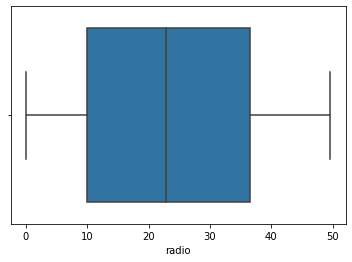

In [499]:
sns.boxplot(df["radio"])

Above boxplot shows there are no outliers present for "radio" column.

<AxesSubplot:xlabel='newspaper'>

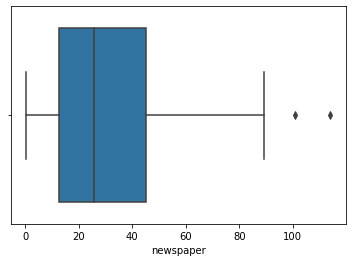

In [500]:
sns.boxplot(df["newspaper"])

From above boxplot we conclude that "newspaper" has two extreme outliers present.

<AxesSubplot:xlabel='sales'>

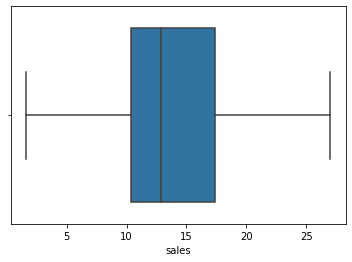

In [501]:
sns.boxplot(df["sales"])

There are no outliers present for target variable "sales".

<AxesSubplot:xlabel='TV', ylabel='Density'>

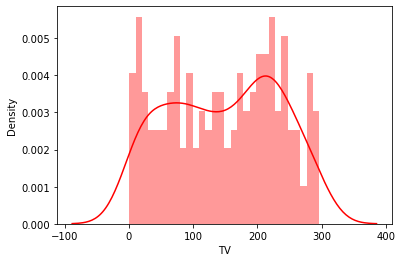

In [502]:
sns.distplot(df["TV"],color="r",bins=30)

Above graph does not show normal distribution for "TV" feature.

<AxesSubplot:xlabel='radio', ylabel='Density'>

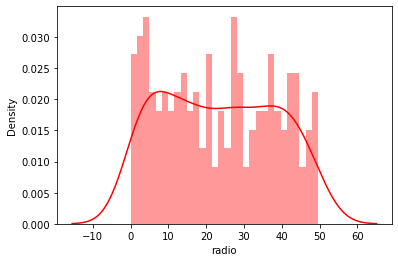

In [503]:
sns.distplot(df["radio"],color='r',bins=30)

Above graph does not show normal distribution for "radio".

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

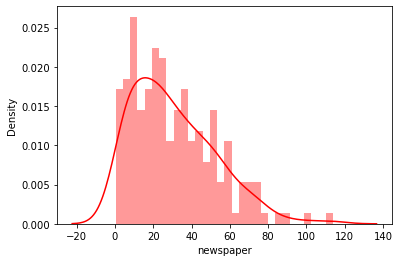

In [504]:
sns.distplot(df["newspaper"],color='r',bins=30)

Above graph shows that "newspaper" has right skewed distribution.

<AxesSubplot:xlabel='sales', ylabel='Density'>

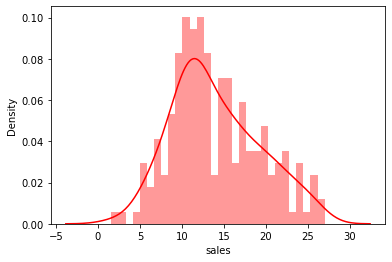

In [505]:
sns.distplot(df["sales"],color='r',bins=30)

Above graph shows an approximate normal distribution for "sales".

### Bivariate Analysis

<AxesSubplot:xlabel='TV', ylabel='sales'>

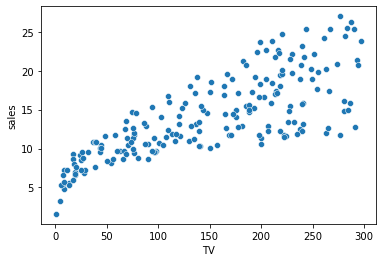

In [506]:
sns.scatterplot(x='TV',y="sales",data=df)

The above scatterplot shows a strong postive relationship between "TV" and "sales". 

<AxesSubplot:xlabel='radio', ylabel='sales'>

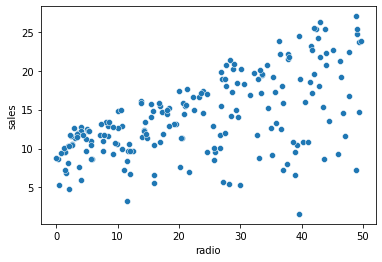

In [507]:
sns.scatterplot(x='radio',y="sales",data=df)

Above scatterplot shows a positive relationship between "radio" and sales.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

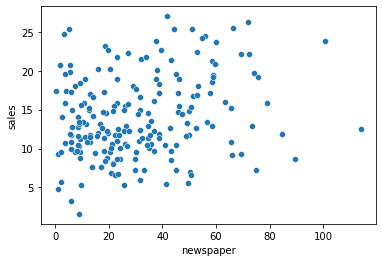

In [508]:
sns.scatterplot(x='newspaper',y="sales",data=df)

From the above scatterplot we can conclude there is a slight positive relationship between "newspaper" and "sales".

### Multivariate Analysis

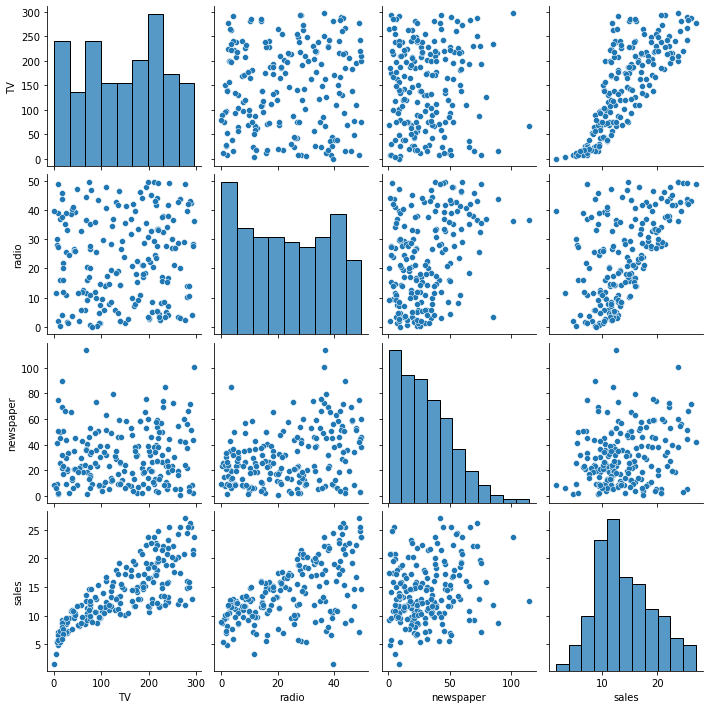

In [509]:
sns.pairplot(df)

Above pairplot shows that our target variable "sales" shows strong positive relationship with "TV" and "Radio". There is a slight positive relation with "newspaper". The distribution is not normal for "TV" and "radio" and normal for "sales. It is right skewed for "newspaper".

<AxesSubplot:>

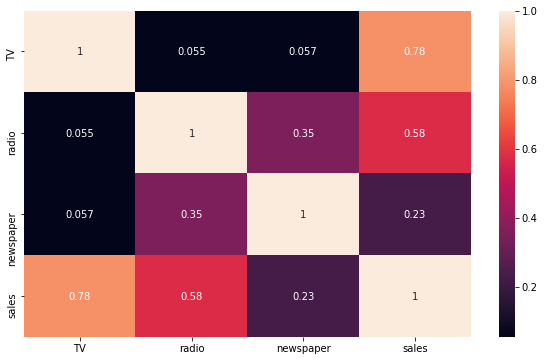

In [510]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [511]:
#Creating function to calculate vif to find the highly correlated columns 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif["Features"]=dataset.columns
    vif["VIF_value"]=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    
    return vif

In [512]:
features=df.iloc[:,:-1]
calculate_vif(features)

,Features,VIF_value
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


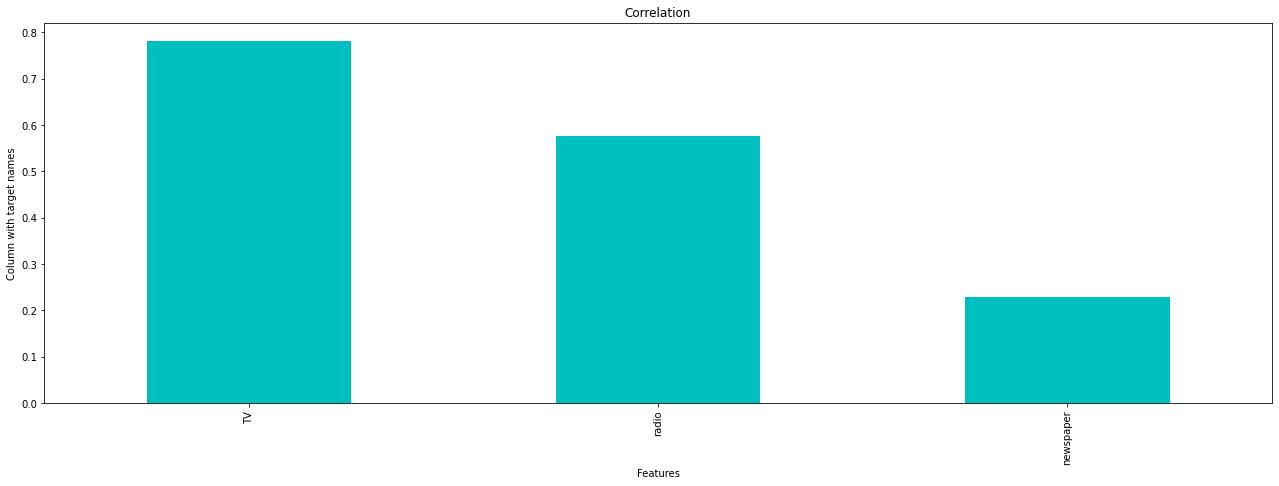

In [513]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

Above bargraph also shows that "newspaper" is least correlated with "sales".

### Removing Outliers

In [514]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [515]:
cols=["TV","radio","newspaper","sales"]

#### Plotting boxplots after removing outliers

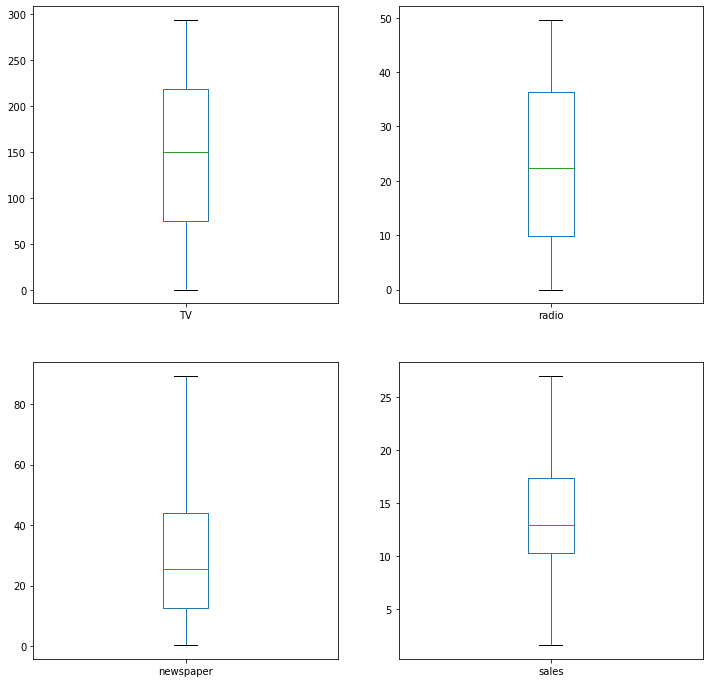

In [516]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
row = col = 0
for n,i in enumerate(cols):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    df_new[i].plot(kind="box",ax=ax[row,col])
    col += 1

All the outliers are removed now.

In [517]:
df.shape

(200, 4)

In [518]:
#checking shape of dataset after removing outliers
df_new.shape

(198, 4)

After removing we have 198 rows and 4 columns.

### Percentage of Data Loss

In [519]:
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

1.00 %


There is 1.00% of data loss with the outlier removal.

### Creating X and Y Split

In [520]:
x=df.drop("sales",axis=1)
y=df["sales"]

### Checking and Removing Skewness

In [521]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

This is the skewness before removing outliers

In [522]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

After removing outliers, Skewness is also reduced but not completely. Here we have skewness only for "newspaper" column.

In [523]:
#removing skewness using SquareRoot Transformation
x["newspaper"]=np.sqrt(x["newspaper"])

In [524]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
dtype: float64

Now, all the skew values are between -0.5 to +0.5. 

### Scaling

There is a difference between the range of values of independent variables. Hence, we are scaling.

In [525]:
from sklearn.preprocessing import MinMaxScaler

In [526]:
MM=MinMaxScaler()
x_scaled=MM.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,TV,radio,newspaper
0,0.775786,0.762097,0.767169
1,0.148123,0.792339,0.608916
2,0.055800,0.925403,0.767763
3,0.509976,0.832661,0.701013
4,0.609063,0.217742,0.700367


Now, all the features values are scaled and the model building will not be biased.

# Building the Model

### Creating train_test_split

In [555]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Finding the Best Random State

In [556]:
from sklearn.tree import DecisionTreeRegressor
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.9771722613358403  on Random State  168


Using the best Random State to create new train_test_split.

In [557]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [558]:
#Importing the packages to build models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### 1. LinearRegression

In [559]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 1.3400475533706893
Mean squared error: 2.754571728306584
Root Mean squared error: 1.6596902507114344
R2 Score: 0.9067991885822844


### 2. Support Vector Regression

In [560]:
SV=SVR()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 1.0096560927390936
Mean squared error: 2.598311343279481
Root Mean squared error: 1.6119278343894559
R2 Score: 0.9120862517316342


### 3. RandomForestRegressor

In [561]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 0.588683333333334
Mean squared error: 0.5730430499999987
Root Mean squared error: 0.7569960700030078
R2 Score: 0.9806111139933481


### 4. DecisionTreeRegressor

In [562]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 0.9066666666666667
Mean squared error: 1.3493333333333337
Root Mean squared error: 1.1616080807799736
R2 Score: 0.9543453669231732


Here, we observe that RandomForestRegressor is giving the highest R2 score of 98%. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [563]:
from sklearn.model_selection import cross_val_score

In [564]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation for LinearRegression

0.8873331295445761


In [565]:
print(cross_val_score(SV,x,y,cv=6).mean()) #cross validation for SVR

0.9257628935437423


In [566]:
print(cross_val_score(RFR,x,y,cv=6).mean()) #cross validation for RandomForestRegressor

0.9783309908550616


In [567]:
print(cross_val_score(DTR,x,y,cv=6).mean()) #cross validation for DecisionTreeRegressor

0.9487501655144203


Here we observe that even after cross validation the score for RandomForestRegressor is still the same and hence its not due to overfitting or underfitting. We can definitely consider it as our best model.

### Hyper Parameter Tuning

Now, let's apply Hyper Paramter Tuning on the best model to improve the r2 score.

In [568]:
from sklearn.model_selection import GridSearchCV

In [569]:
parameters={'criterion':['mse','mae'],
           'n_estimators':[10,30,50,100],
           'max_depth':[2,3,4,5,7,8],
           'max_features':['auto','sqrt','log2']}

In [570]:
GCVRFR=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [571]:
GCVRFR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 30, 50, 100]})

In [572]:
GCVRFR.best_params_

{'criterion': 'mae',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [583]:
Final_modelRFR=RandomForestRegressor(criterion="mae",max_depth=7,max_features="auto",n_estimators=100)
Final_modelRFR.fit(x_train,y_train)
pred=Final_modelRFR.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

98.01717928973662


After Hyper Parameter tuning, the improved score of the best model RandomForestRegressor is 98.01%

### Saving the Model

In [587]:
import joblib
joblib.dump(Final_modelRFR,"AdvertisingSalesChannelPrediction.pkl")

['AdvertisingSalesChannelPrediction.pkl']